In [2]:
import numpy as np
import matplotlib.pyplot as plt

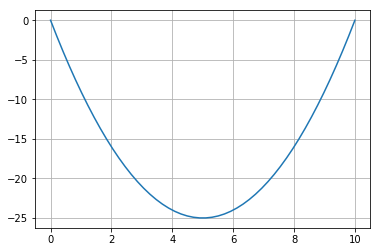

In [3]:
xs = np.linspace(0, 10, num=50)
ys = xs * xs - 10 * xs
plt.plot(xs, ys, label = "Parabola")
plt.grid(True)
plt.savefig("parabola.png", DPI=200)

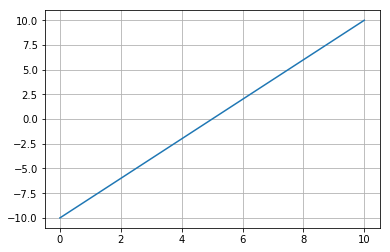

In [13]:
ys2 = 2 * xs - 10
plt.plot(xs, ys2, label = "Derivative")
plt.grid(True)
plt.savefig("line.png", DPI=200)

$$
f(x) = \frac{1}{14}(x+4)(x+1)(x-1)(x-3) + \frac{1}{2}
$$

$$
f(x) = \frac{1}{14}(x+4)(x+1)(x^2-4x+3) + \frac{1}{2}
$$

$$
f(x) = \frac{1}{14}(x+4)(x^3-3x^2-x+3) + \frac{1}{2}
$$

$$
f(x) = \frac{1}{14}(x^4+x^3-13x^2-x+12) + \frac{1}{2}
$$

$$
f(x) = \frac{1}{14}(x^4+x^3-13x^2-x) + \frac{19}{14}
$$

$$
f'(x) = \frac{4}{14}x^3 + \frac{3}{14}x^2 - \frac{26}{14}x - \frac{1}{14}
$$

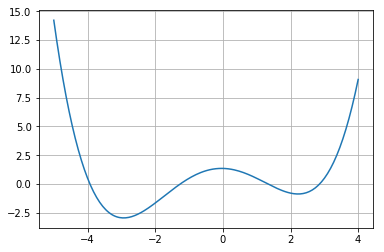

In [7]:
xs = np.linspace(-5, 4, num=200)
ys = np.power(xs, 4) / 14. + np.power(xs, 3) / 14. - 13 * np.power(xs, 2) / 14. - xs / 14. + 19.0 / 14.
plt.plot(xs, ys, label = "Derivative")
plt.grid(True)
plt.savefig("quartic.png")

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.54260013],
       [2.97482676]])

In [19]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

print(theta.shape, X_b.shape)

thetas = [theta]
diff = X_b.dot(theta) - y
mse = diff.T.dot(diff) / m
print(mse[0, 0])
mses = [mse[0, 0]]

for i in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    thetas.append(theta)
    diff = X_b.dot(theta) - y
    mse = diff.T.dot(diff) / m
    mses.append(mse[0, 0])


(2, 1) (100, 2)
84.88454718349287


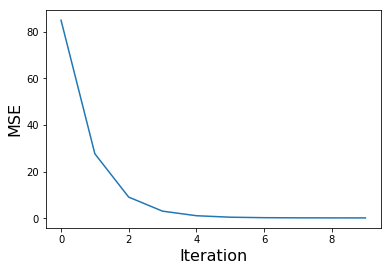

In [22]:
plt.plot(mses[:10])
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.savefig("gd_mse.png", DPI=300)

In [9]:
X = 2 * np.random.rand(100, 1)
y = np.zeros(100)
y[X[:, 0] > 1] = 1.0
X_b = np.c_[np.ones((100, 1)), X]
print(X[:10, 0], y[:10])

[1.70077654 0.70571909 0.28850829 0.25071236 0.81906693 0.350679
 0.95220691 0.77630273 1.316309   0.03660508] [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
from sklearn.metrics import log_loss

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

def predict(X_b, theta):
    prob = 1.0 / (1.0 + np.exp(-X_b.dot(theta)))
    return prob[:, 0]

def loss_gradients(X_b, theta, y):
    gradients = 1.0 / m * X_b.T.dot(predict(X_b, theta) - y)
    return gradients

thetas = [theta]
pred = predict(X_b, theta)
loss = log_loss(y, pred)
losses = [loss]


for i in range(n_iterations):
    theta = theta - eta * loss_gradients(X_b, theta, y)
    thetas.append(theta)
    pred = predict(X_b, theta) 
    loss = log_loss(y, pred)
    losses.append(loss)


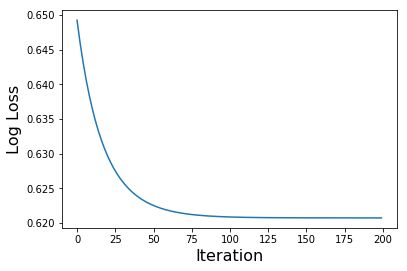

In [23]:
plt.plot(losses[:200])
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Log Loss", fontsize=16)
plt.savefig("gd_loss.png", DPI=300)